In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create features and target variable
features = ["Price", "Change"]
target = "Price"

# Select features and target data
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# Predict future prices based on new data
new_data = pd.DataFrame({
    "Date": ["2024-01-01"],
    "Price": [786.84],  # Assuming this is the latest price
    "Change": [0],  # Change needs to be manually provided or derived
})

new_data_scaled = scaler.transform(new_data[features])
predicted_price = model.predict(new_data_scaled)

print(f"Predicted price for 2024-01-01: {predicted_price[0]:.3f}")







Mean Squared Error: 0.000
R-squared: 1.000
Predicted price for 2024-01-01: 786.840


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Feature engineering: Add lag features
data["Price_Lag1"] = data["Price"].shift(1)
data["Price_Lag2"] = data["Price"].shift(2)
data["Change_Lag1"] = data["Change"].shift(1)
data["Change_Lag2"] = data["Change"].shift(2)

# Create features and target variable
features = ["Price", "Change", "Price_Lag1", "Price_Lag2", "Change_Lag1", "Change_Lag2"]
target = "Price"

# Select features and target data, drop NaN values
data = data.dropna()
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a RandomForestRegressor model with time series cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42)

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation scores
cv_scores = cross_val_score(model, X_scaled, y, cv=tscv, scoring='neg_mean_squared_error')
rmse_scores = [(-score)**0.5 for score in cv_scores]

print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {sum(rmse_scores) / len(rmse_scores):.3f}")

# Train the model on the entire dataset
model.fit(X_scaled, y)

# Predict prices for the next 3 days
last_date = data["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({
    "Price": [data["Price"].iloc[-1]] * 3,
    "Change": [data["Change"].iloc[-1]] * 3,
    "Price_Lag1": [data["Price"].iloc[-1]] * 3,
    "Price_Lag2": [data["Price"].iloc[-2]] * 3,
    "Change_Lag1": [data["Change"].iloc[-1]] * 3,
    "Change_Lag2": [data["Change"].iloc[-2]] * 3,
}, index=future_dates)

future_data_scaled = scaler.transform(future_data)
predicted_prices = model.predict(future_data_scaled)

# Print predicted values for the next 3 days
for date, predicted_price in zip(future_dates, predicted_prices):
    print(f"Predicted price for {date}: {predicted_price:.3f}")


Cross-Validation RMSE Scores: [13.319223169126593, 0.3186042995107308, 0.3272178385011532, 0.15260629191899497, 4.260126285784567]
Mean RMSE: 3.676
Predicted price for 2024-01-01 00:00:00: 748.139
Predicted price for 2024-01-02 00:00:00: 748.139
Predicted price for 2024-01-03 00:00:00: 748.139


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create features and target variable
features = ["Price", "Change"]
target = "Price"

# Select features and target data
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a linear regression model on the entire dataset
model = LinearRegression()
model.fit(X_scaled, y)

# Predict prices for the next 3 days
last_date = data["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({
    "Date": future_dates,
    "Price": [0] * 3,  # Placeholder, as we're predicting
    "Change": [0] * 3   # Placeholder
})
future_data_scaled = scaler.transform(future_data[features])
predicted_prices = model.predict(future_data_scaled)

# Print predicted values for the next 3 days
for date, predicted_price in zip(future_dates, predicted_prices):
    print(f"Predicted price for {date}: {predicted_price:.3f}")


Predicted price for 2024-01-01 00:00:00: 0.000
Predicted price for 2024-01-02 00:00:00: 0.000
Predicted price for 2024-01-03 00:00:00: 0.000


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create features and target variable
features = ["Price", "Change"]
target = "Price"

# Select features and target data
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a linear regression model on the entire dataset
model = LinearRegression()
model.fit(X_scaled, y)

# Predict prices for the next 3 days
last_date = data["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({
    "Date": future_dates,
    "Price": [0] * 3,  # Placeholder, as we're predicting
    "Change": [0] * 3   # Placeholder
})
future_data_scaled = scaler.transform(future_data[features])
predicted_prices = model.predict(future_data_scaled)

# Print predicted values for the next 3 days
for date, predicted_price in zip(future_dates, predicted_prices):
    print(f"Predicted price for {date}: {predicted_price:.3f}")


Predicted price for 2024-01-01 00:00:00: 0.000
Predicted price for 2024-01-02 00:00:00: 0.000
Predicted price for 2024-01-03 00:00:00: 0.000


Mean Squared Error: 0.000
R-squared: 1.000


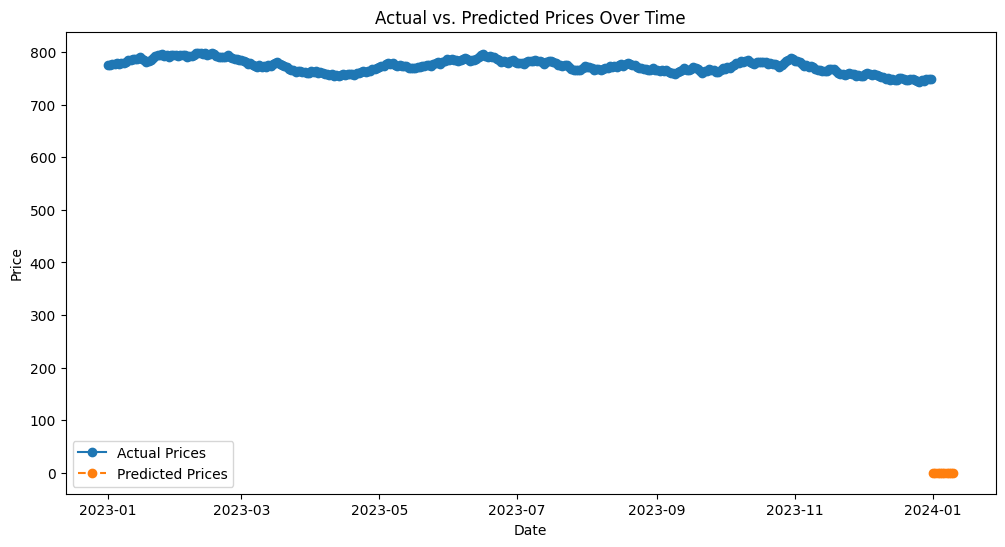

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create features and target variable
features = ["Price", "Change"]
target = "Price"

# Select features and target data
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# Visualize past and predicted prices for the next ten days
plt.figure(figsize=(12, 6))

# Plot past prices
plt.plot(data["Date"], data["Price"], label="Actual Prices", marker='o')

# Predict future prices for the next ten days
future_dates = pd.date_range(start=data["Date"].max() + pd.Timedelta(days=1), periods=10, freq='D')
future_data = pd.DataFrame({
    "Date": future_dates,
    "Price": [0] * 10,  # Placeholder, as we're predicting
    "Change": [0] * 10   # Placeholder
})
future_data_scaled = scaler.transform(future_data[features])
predicted_future_prices = model.predict(future_data_scaled)

# Plot predicted prices for the next ten days
plt.plot(future_dates, predicted_future_prices, label="Predicted Prices", linestyle='dashed', marker='o')

plt.title("Actual vs. Predicted Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Mean Squared Error: 0.000
Mean Absolute Error: 0.000
R-squared: 1.000


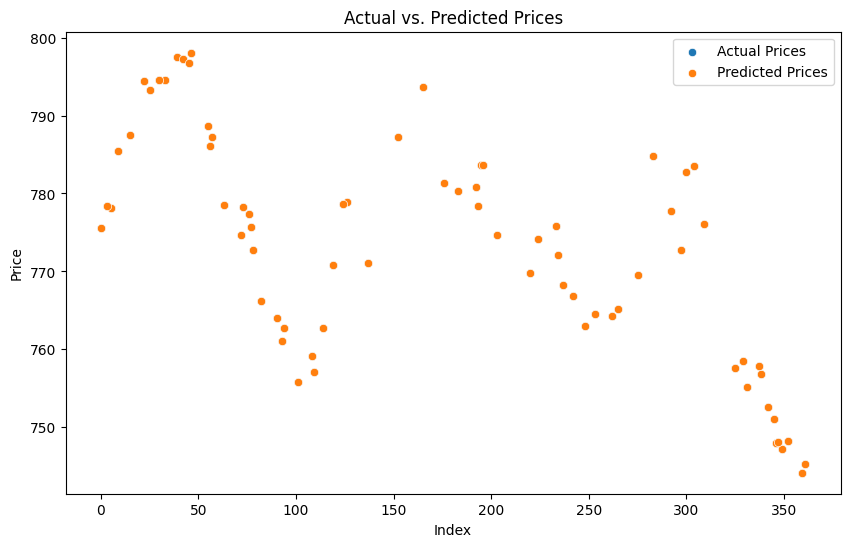

Predicted price for 2024-01-01: 786.840


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create features and target variable
features = ["Price", "Change"]
target = "Price"

# Select features and target data
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared: {r2:.3f}")

# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label="Actual Prices")
sns.scatterplot(x=y_test.index, y=y_pred, label="Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

# Predict future prices based on new data
new_data = pd.DataFrame({
    "Date": ["2024-01-01"],
    "Price": [786.84],  # Assuming this is the latest price
    "Change": [0],  # Change needs to be manually provided or derived
})

new_data_scaled = scaler.transform(new_data[features])
predicted_price = model.predict(new_data_scaled)

print(f"Predicted price for 2024-01-01: {predicted_price[0]:.3f}")


Mean Squared Error: 0.000
R-squared: 1.000
Predicted price for 2024-01-01 00:00:00: 0.000
Predicted price for 2024-01-02 00:00:00: 0.000
Predicted price for 2024-01-03 00:00:00: 0.000
Predicted price for 2024-01-04 00:00:00: 0.000
Predicted price for 2024-01-05 00:00:00: 0.000
Predicted price for 2024-01-06 00:00:00: 0.000
Predicted price for 2024-01-07 00:00:00: 0.000
Predicted price for 2024-01-08 00:00:00: 0.000
Predicted price for 2024-01-09 00:00:00: 0.000
Predicted price for 2024-01-10 00:00:00: 0.000


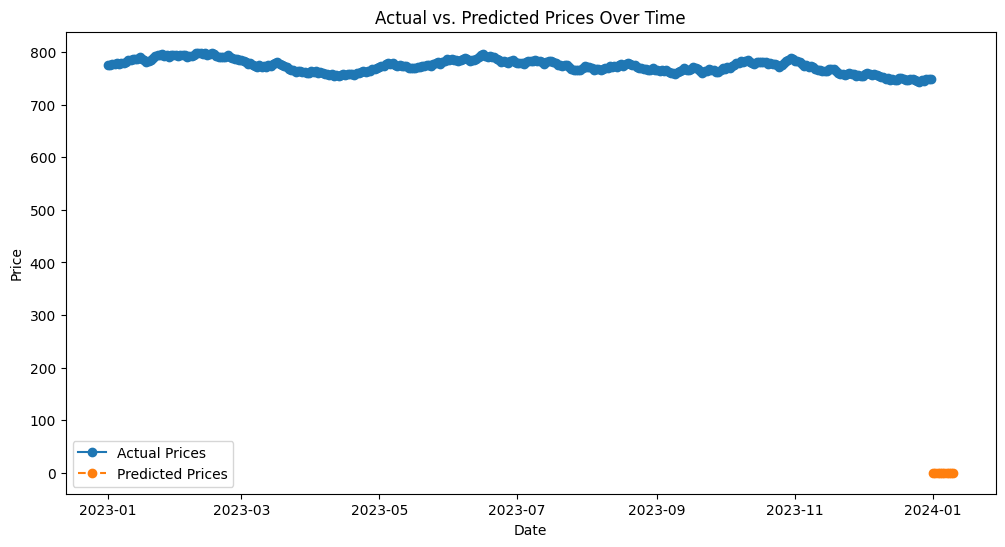

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create features and target variable
features = ["Price", "Change"]
target = "Price"

# Select features and target data
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# Visualize past and predicted prices for the next ten days
plt.figure(figsize=(12, 6))

# Plot past prices
plt.plot(data["Date"], data["Price"], label="Actual Prices", marker='o')

# Predict future prices for the next ten days
future_dates = pd.date_range(start=data["Date"].max() + pd.Timedelta(days=1), periods=10, freq='D')
future_data = pd.DataFrame({
    "Date": future_dates,
    "Price": [0] * 10,  # Placeholder, as we're predicting
    "Change": [0] * 10   # Placeholder
})
future_data_scaled = scaler.transform(future_data[features])
predicted_future_prices = model.predict(future_data_scaled)

# Plot predicted prices for the next ten days
plt.plot(future_dates, predicted_future_prices, label="Predicted Prices", linestyle='dashed', marker='o')

# Print predicted values for the next ten days
for date, predicted_price in zip(future_dates, predicted_future_prices):
    print(f"Predicted price for {date}: {predicted_price:.3f}")

plt.title("Actual vs. Predicted Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Load the data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Feature engineering: Add lag features
data["Price_Lag1"] = data["Price"].shift(1)
data["Price_Lag2"] = data["Price"].shift(2)
data["Change_Lag1"] = data["Change"].shift(1)
data["Change_Lag2"] = data["Change"].shift(2)

# Create features and target variable
features = ["Price", "Change", "Price_Lag1", "Price_Lag2", "Change_Lag1", "Change_Lag2"]
target = "Price"

# Select features and target data, drop NaN values
data = data.dropna()
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = XGBRegressor()

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring=make_scorer(mean_squared_error), n_jobs=-1)
grid_search.fit(X_scaled, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_model = grid_search.best_estimator_

# Cross-validation scores
cv_scores = grid_search.cv_results_['mean_test_score']
rmse_scores = [(-score)**0.5 for score in cv_scores]

print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {sum(rmse_scores) / len(rmse_scores):.3f}")

# Train the best model on the entire dataset
best_model.fit(X_scaled, y)

# Predict prices for the next 3 days
last_date = data["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({
    "Price": [data["Price"].iloc[-1]] * 3,
    "Change": [data["Change"].iloc[-1]] * 3,
    "Price_Lag1": [data["Price"].iloc[-1]] * 3,
    "Price_Lag2": [data["Price"].iloc[-2]] * 3,
    "Change_Lag1": [data["Change"].iloc[-1]] * 3,
    "Change_Lag2": [data["Change"].iloc[-2]] * 3,
}, index=future_dates)

future_data_scaled = scaler.transform(future_data)
predicted_prices = best_model.predict(future_data_scaled)

# Print predicted values for the next 3 days
for date, predicted_price in zip(future_dates, predicted_prices):
    print(f"Predicted price for {date}: {predicted_price:.3f}")


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Cross-Validation RMSE Scores: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Mean RMSE: nan
Predicted price for 2024-01-01 00:00:00: 764.035
Predicted price for 2024-01-02 00:00:00: 764.035
Predicted price for 2024-01-03 00:00:00: 764.035


<ipython-input-25-094534e19f22>:59: RuntimeWarning: invalid value encountered in double_scalars
  rmse_scores = [(-score)**0.5 for score in cv_scores]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras


# Load data
data = pd.read_csv("/content/wool_prices_2023.csv")

# Convert date to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Feature engineering
data["Price_Lag1"] = data["Price"].shift(1)
data["Price_Lag2"] = data["Price"].shift(2)
data["Change_Lag1"] = data["Change"].shift(1)
data["Change_Lag2"] = data["Change"].shift(2)

# Day of week feature
data["DayOfWeek"] = data["Date"].dt.weekday

# Define features and target
features = [
    "Price", "Change", "Price_Lag1", "Price_Lag2", "Change_Lag1", "Change_Lag2", "DayOfWeek"
]
target = "Price"

# Drop NaN values
data = data.dropna()
X = data[features]
y = data[target]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    "XGBoost": XGBRegressor(),
    "LSTM": tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, activation="relu", input_shape=(X_scaled.shape[1], 1)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV for parameter tuning (model-specific parameters)
param_grids = {
    "XGBoost": {"n_estimators": [50, 100, 200], "max_depth": [3, 4, 5]},
    "LSTM": {"epochs": [10, 20, 30], "batch_size": [32, 64, 128]}
}

# Evaluate models with cross-validation
cv_scores = {}
for model_name, model in models.items():
    random_search = RandomizedSearchCV(
    LSTM, param_grids["LSTM"], cv=tscv, scoring=make_scorer(mean_squared_error), n_jobs=-1
)
random_search.fit(X_scaled, y)
cv_scores[model_name] = -grid_search.cv_results_["mean_test_score"]


# Compare model performance
print("Cross-validation RMSE scores:")
for model_name, scores in cv_scores.items():
    print(f"{model_name}: {scores.mean():.3f}")

# Select best model based on CV scores
best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

# Train best model on entire dataset
best_model.fit(X_scaled, y)

# Predict future prices (replace logic for generating future data)
last_date = data["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=3, freq="D")
future_data = pd.DataFrame({
    "Price": [data["Price"].iloc[-1]] * 3,
    "Change": [data["Change"].iloc[-1]] * 3,
    "Price_Lag1": [data["Price"].iloc[-1]] * 3,
    "Price_Lag2": [data["Price"].iloc[-2]] * 3,
    "Change_Lag1": [data["Change"].iloc[-1]] * 3,
    "Change_Lag2": [data["Change"].iloc[-2]] * 3,
    "DayOfWeek": [future_dates.dt.weekday.iloc[0]] * 3,
}, index=future_dates)

future_data_scaled = scaler.transform(future_data)
predicted_prices = best_model.predict(future_data_scaled)


NameError: ignored

In [ ]:
from tensorflow import keras

# Define your LSTM model with Keras layers
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation="relu", input_shape=(X_scaled.shape[1], 1)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

# Add the model to your dictionary with a relevant name
models["LSTM"] = model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset (assuming it's in a CSV format with 'Date' and 'Price' columns)
# Replace 'your_dataset.csv' with the actual name of your dataset file
data = pd.read_csv('wool_prices_2023.csv')

# Convert 'Date' column to datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check if the dataset is loaded correctly
print(data.head())

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

# Creating training and testing datasets
train_data = scaled_data[:int(0.8 * len(data))]
test_data = scaled_data[int(0.8 * len(data)):]

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    input_seq, output_seq = [], []
    for i in range(len(data) - seq_length):
        input_seq.append(data[i:i + seq_length])
        output_seq.append(data[i + seq_length])
    return np.array(input_seq), np.array(output_seq)

# Define sequence length
sequence_length = 10

# Create sequences for training
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data for LSTM input [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32)

# Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Price')
plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Price', color='red')
plt.title('Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()0

